In [1]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 69.8 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sweetviz as sv

from IPython.display import IFrame

# General info

In [3]:
# Load the datasets
train_df = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")

# Display basic info for train_df
print("train_df:\n")
print(train_df.info())
print(train_df.describe())
print()
print(train_df.isna().sum())
print()

# Display basic info for test_df
print("test_df:\n")
print(test_df.info())
print(test_df.describe())
print()
print(test_df.isna().sum())
print()

train_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
None
                  id       num_sold
count  230130.000000  221259.000000
mean   115064.500000     752.527382
std     66432.953062     690.165445
min         0.000000       5.000000
25%     57532.250000     219.000000
50%    115064.500000     605.000000
75%    172596.750000    1114.000000
max    230129.000000    5939.000000

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

test_df:

<class 'pandas.core.frame.DataFrame'>
Ra

In [4]:
# Categorical Features
print(train_df['country'].value_counts())
print()
print(train_df['store'].value_counts())
print()
print(train_df['product'].value_counts())

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64


# Sweetviz Report

In [5]:
# Create the sweetviz report
report = sv.analyze(train_df)
report.show_html('train_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report train_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
# Display the report
IFrame('train_report.html', width=900, height=600)

In [7]:
# Convert date to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Extract features from the date
for df in [train_df, test_df]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.weekday

# Add seasonal features
for df in [train_df, test_df]:
    df['is_weekend'] = (df['weekday'] >= 5).astype(int)

# Time Series of "num_sold"

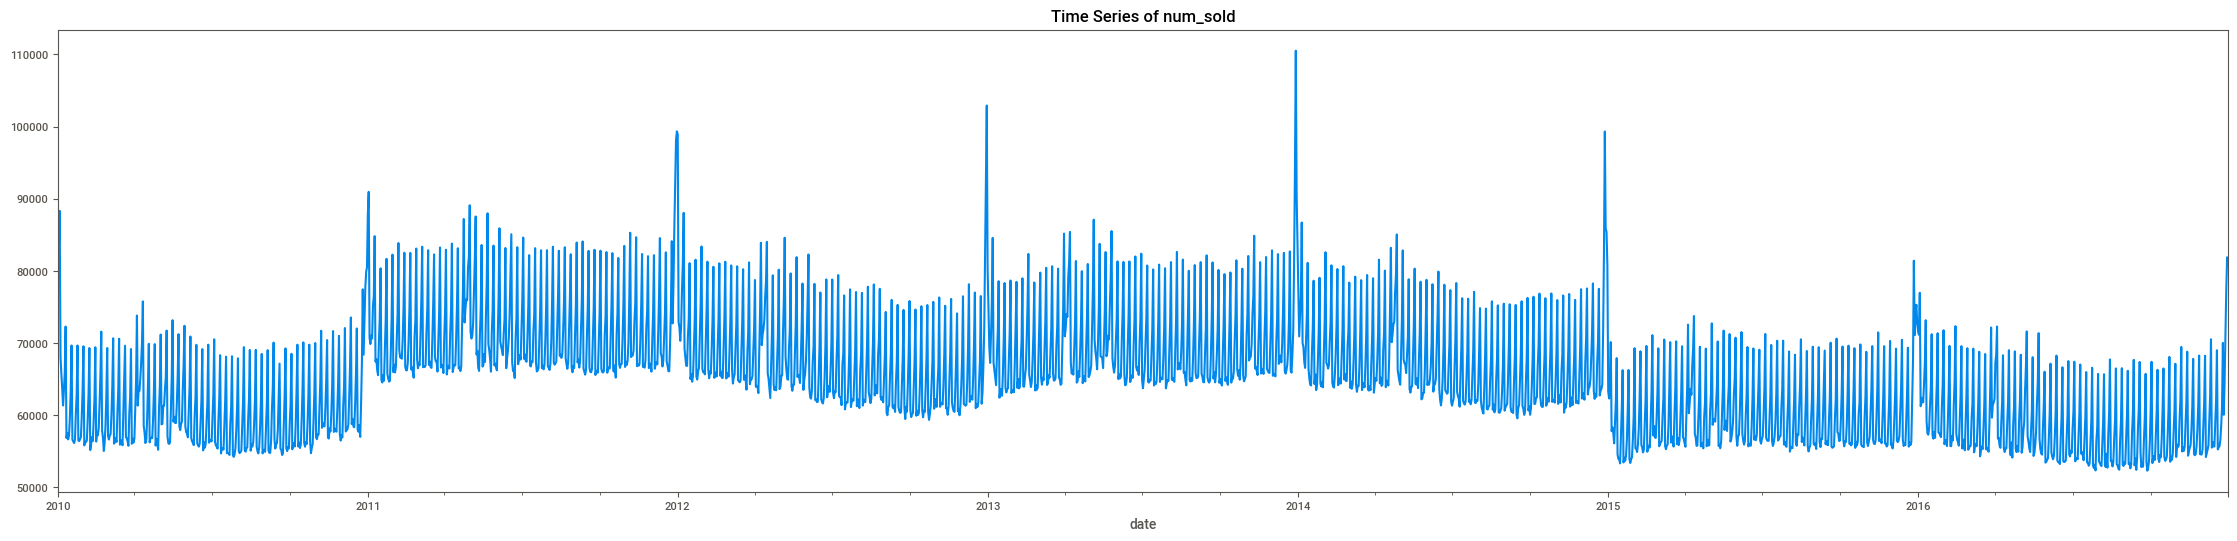

In [8]:
# Plot time series of num_sold
train_df.groupby('date')['num_sold'].sum().plot(figsize=(28, 6))
plt.title('Time Series of num_sold')
plt.show()

# Average "num_sold" by Country and Store

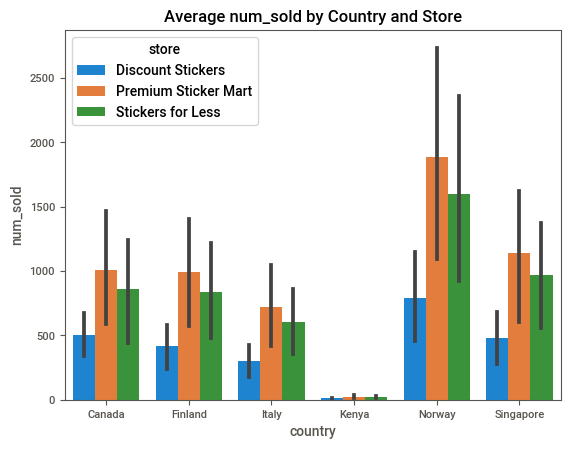

In [9]:
# Group by country, store, and product
grouped = train_df.groupby(['country', 'store', 'product'])['num_sold'].mean().reset_index()

# Visualize
sns.barplot(data=grouped, x='country', y='num_sold', hue='store')
plt.title('Average num_sold by Country and Store')
plt.show()

# Average "num_sold" by Month and Weekday

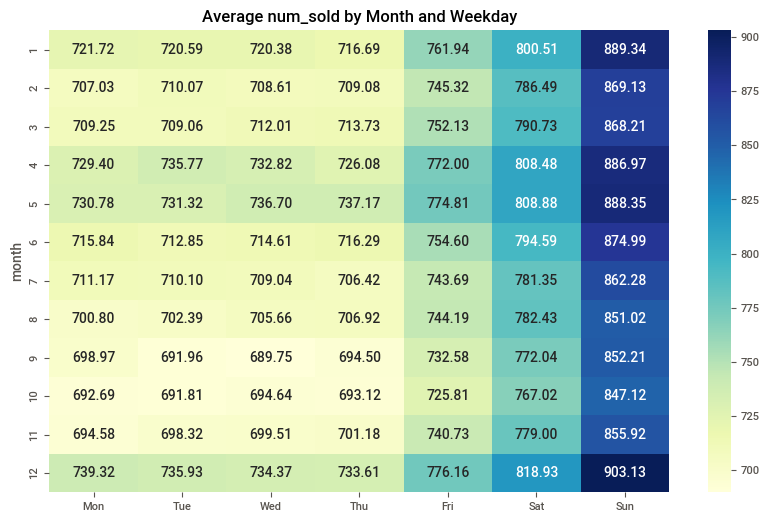

In [10]:
# Create a mapping for weekdays (0=Mon, 1=Tue, ..., 6=Sun)
weekday_labels = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Pivot table
heatmap_data = train_df.pivot_table(index='month', columns='weekday', values='num_sold', aggfunc='mean')

# Rename columns 
heatmap_data.columns = [weekday_labels[col] for col in heatmap_data.columns]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', annot_kws={"size": 10})
plt.title('Average num_sold by Month and Weekday')
plt.show()

# Missing "num_sold" values analysis

In [11]:
counts = train_df.groupby(["country","store","product"])["num_sold"].count()
missing_data = counts.loc[counts != 2557]
missing_data_df = missing_data.reset_index()
missing_data_df["num_sold_missing"] = 2557 - missing_data_df["num_sold"]
missing_data_df

,country,store,product,num_sold,num_sold_missing
0,Canada,Discount Stickers,Holographic Goose,0,2557
1,Canada,Discount Stickers,Kerneler,2556,1
2,Canada,Premium Sticker Mart,Holographic Goose,2177,380
3,Canada,Stickers for Less,Holographic Goose,1249,1308
4,Kenya,Discount Stickers,Holographic Goose,0,2557
5,Kenya,Discount Stickers,Kerneler,2494,63
6,Kenya,Discount Stickers,Kerneler Dark Mode,2556,1
7,Kenya,Premium Sticker Mart,Holographic Goose,1911,646
8,Kenya,Stickers for Less,Holographic Goose,1199,1358


<ipython-input-12-f6916ce4f2f4>:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


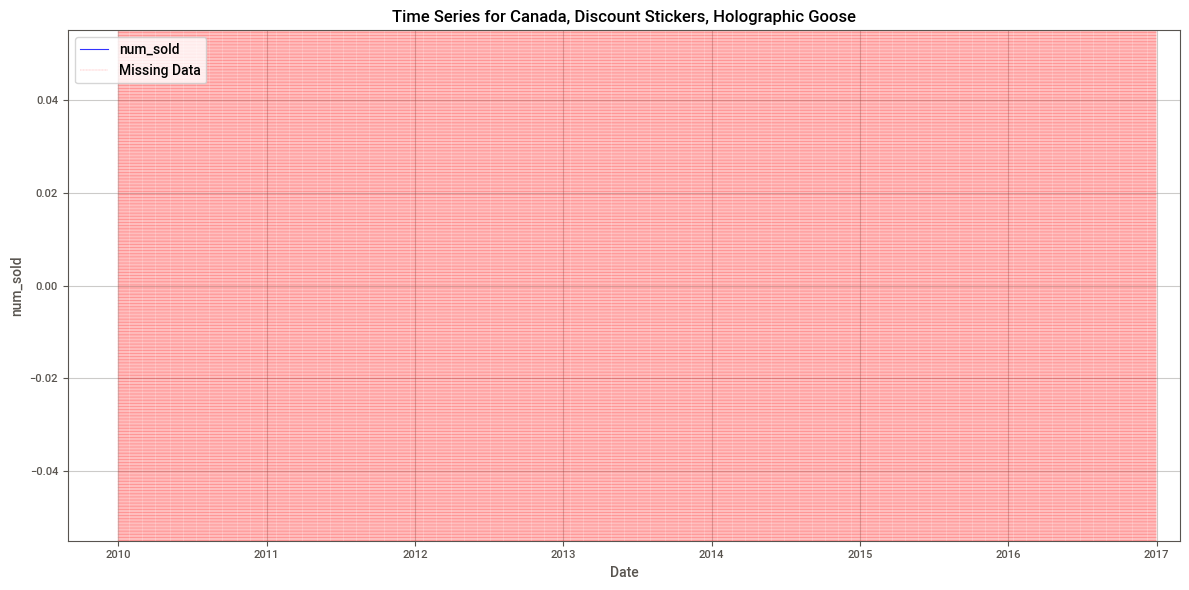

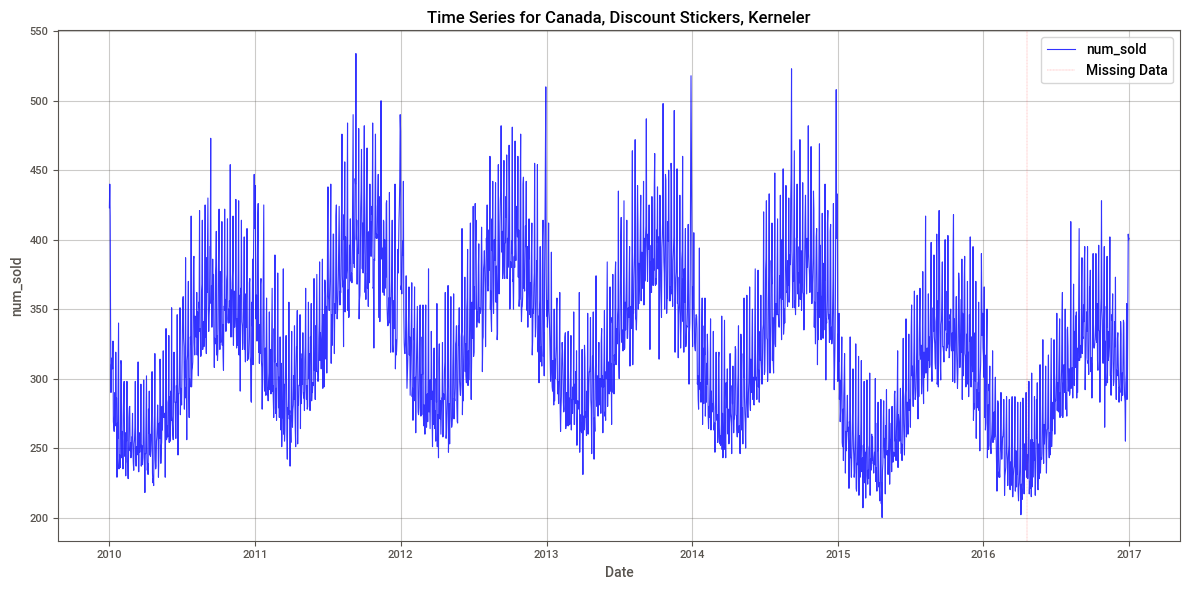

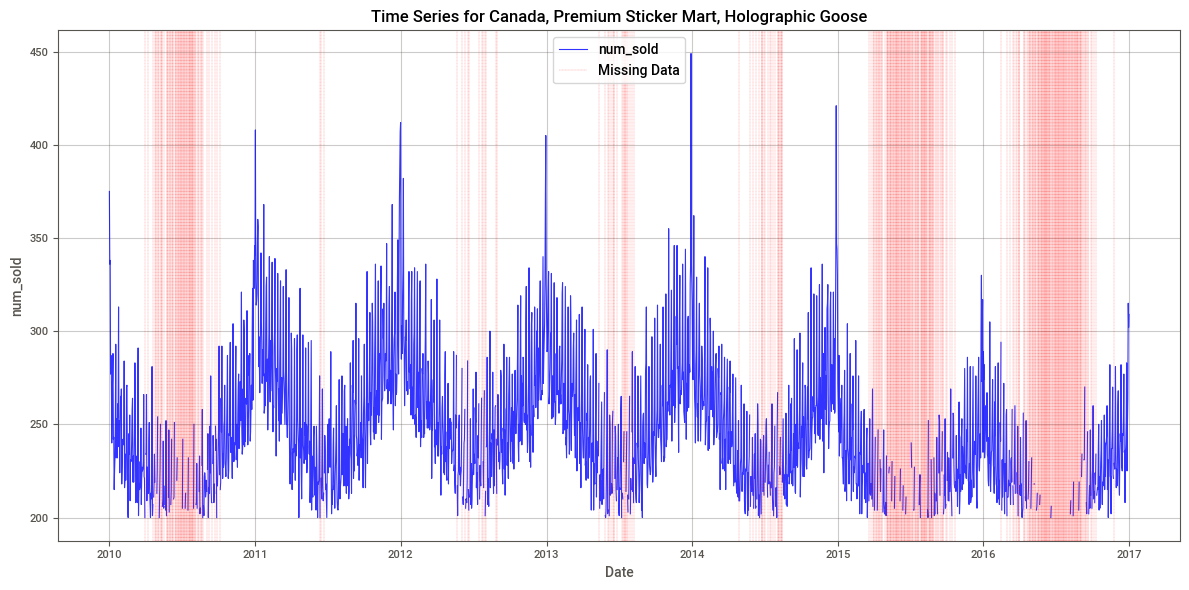

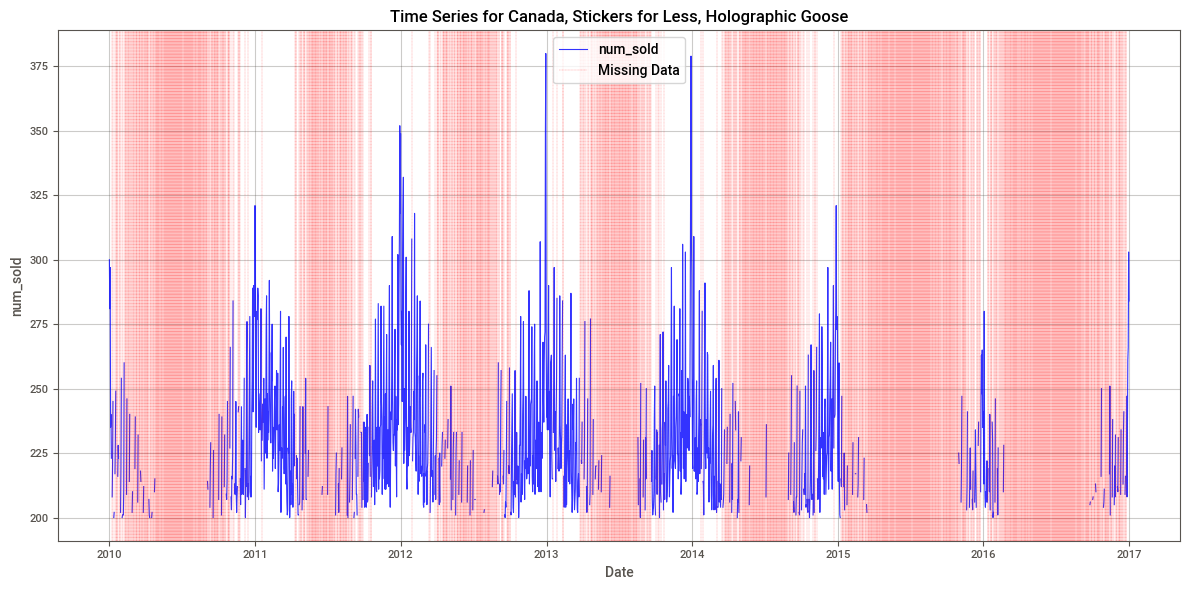

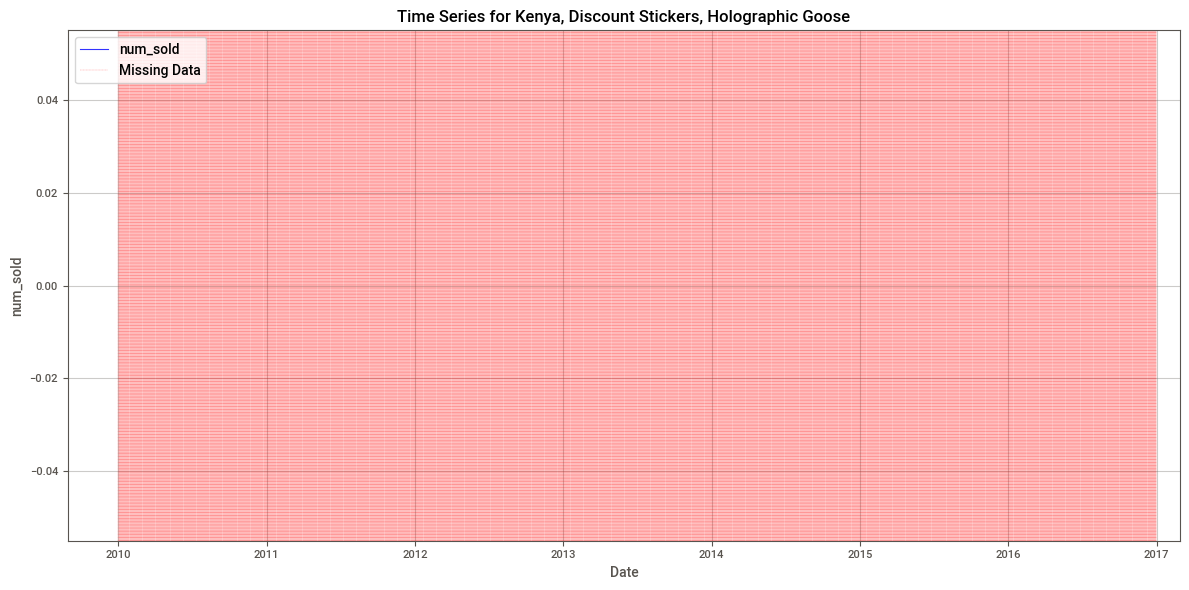

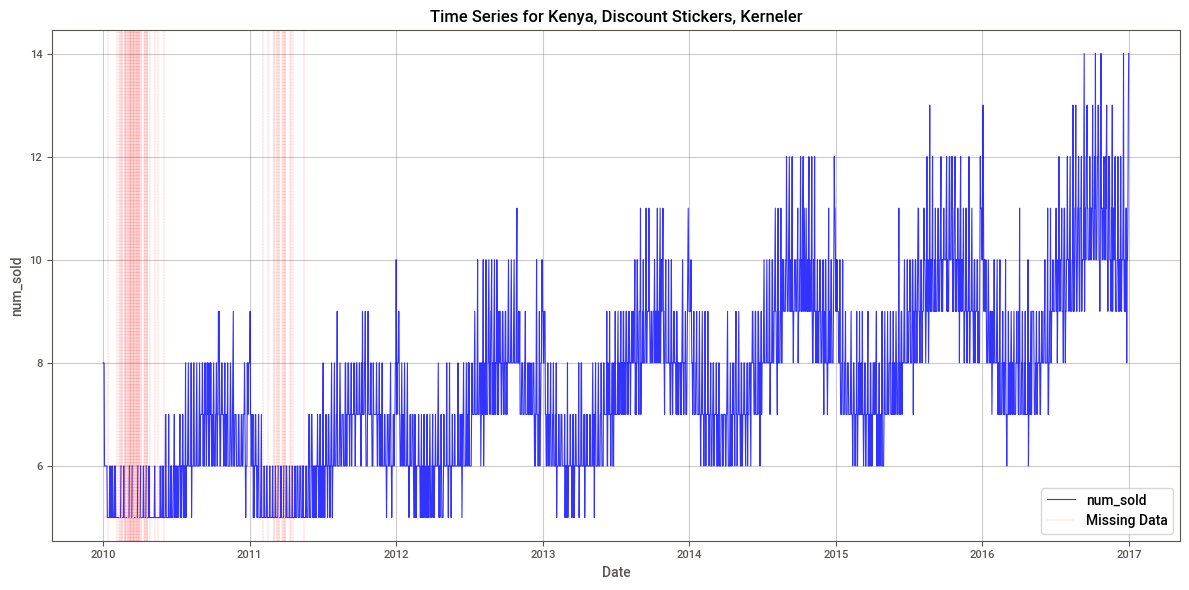

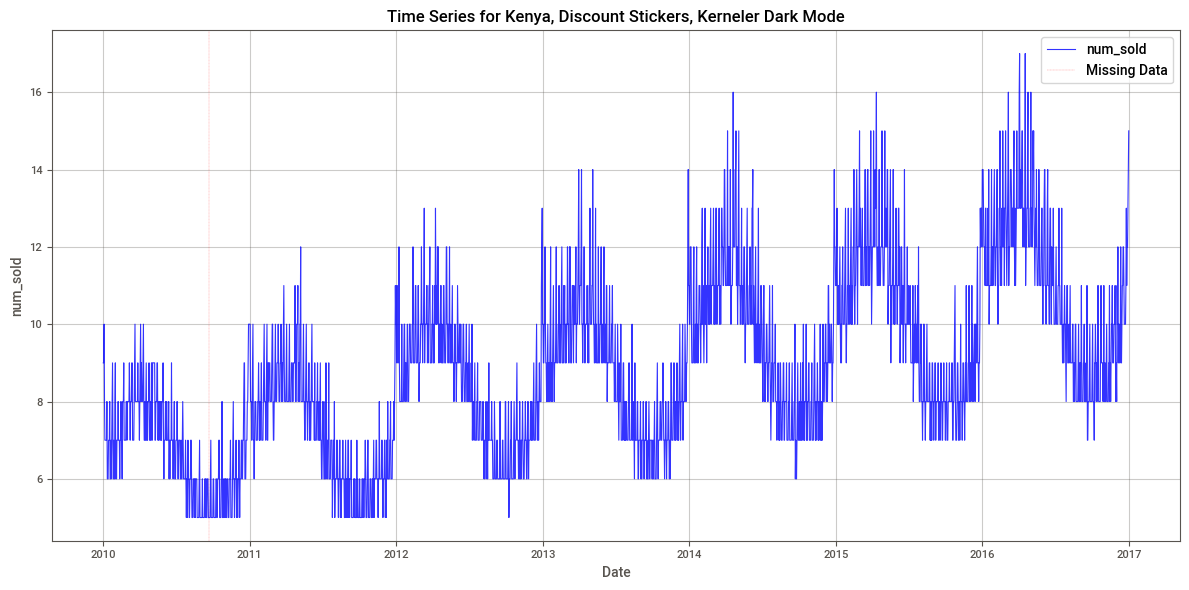

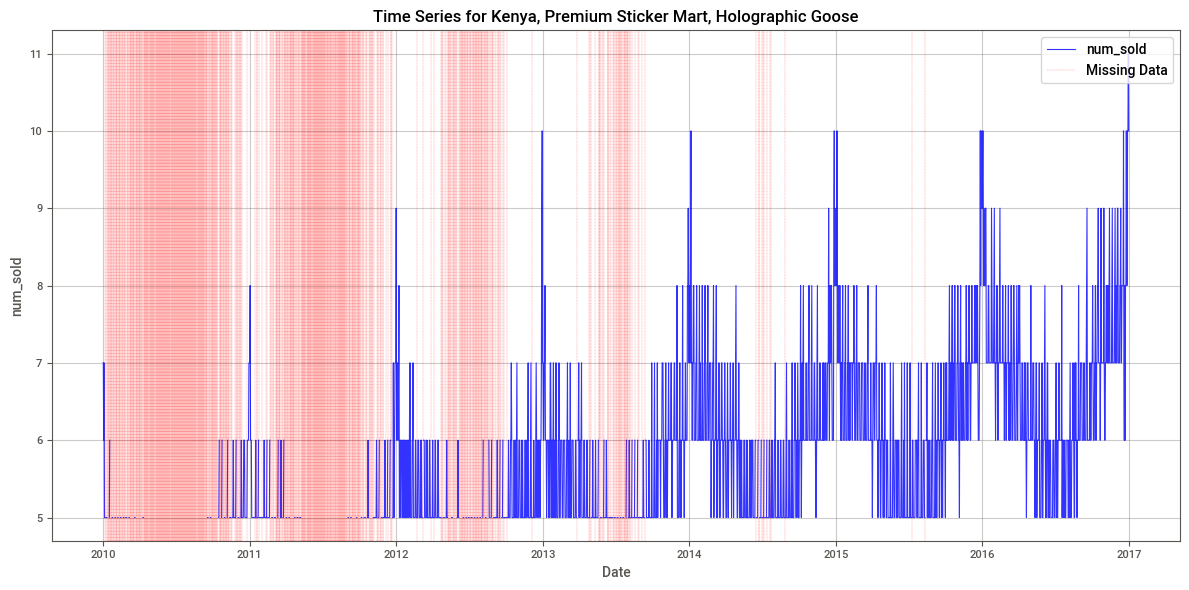

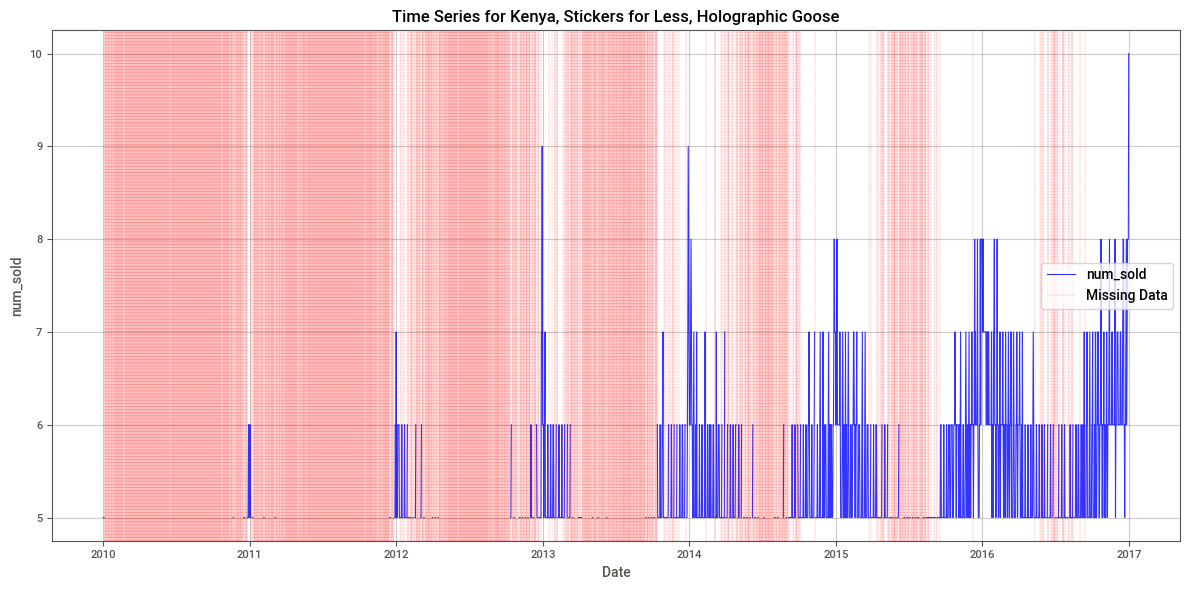

In [12]:
missing_data = train_df[train_df['num_sold'].isna()]
triplets_with_nan = missing_data.groupby(['country', 'store', 'product']).size().reset_index(name='missing_count')
triplets_with_nan = triplets_with_nan[triplets_with_nan['missing_count'] > 0]

# Visualization of missing "num_sold" values
for _, triplet in triplets_with_nan.iterrows():
    country, store, product = triplet['country'], triplet['store'], triplet['product']
    
    triplet_data = train_df[(train_df['country'] == country) & 
                            (train_df['store'] == store) & 
                            (train_df['product'] == product)]
    
    missing_dates = triplet_data[triplet_data['num_sold'].isna()]['date']
    
    # Plot the time series
    plt.figure(figsize=(12, 6))
    plt.plot(triplet_data['date'], triplet_data['num_sold'], 
             label='num_sold', linewidth=0.8, alpha=0.8, color='blue')
    plt.title(f'Time Series for {country}, {store}, {product}')
    plt.xlabel('Date')
    plt.ylabel('num_sold')
    
    # Add vertical red lines for missing dates
    for missing_date in missing_dates:
        plt.axvline(missing_date, color='red', linestyle='--', linewidth=0.2, alpha=0.7, label='Missing Data')
    
    # Adjust legend to avoid duplicates
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()